In [1]:
import pandas as pd

In [2]:
# поработаем немного с Пандас

# далее загрузим ДС в Джупитер и посмотрим на него
# в нем которовки Биткоина с 17 сентября 2014 по по 06 января 2023

In [3]:
btc = pd.read_csv('BTC-USD.csv')
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3394,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
3395,2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
3396,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
3397,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347


In [4]:
# посмотреть на размер ДФа можно и с функцей shape, которая вернёт пару кол-ва строк и колонок

In [5]:
btc.shape

(3399, 7)

In [6]:
# часто при работе с большими наборами данных могут возникать проблемы с пропущенными или недоступными данными
# один из способов это проверить находится ниже - функция isna()
# суммарное кол-во конфликтов подсчитаем через функцию sum()

# видим, что у нас с данными всё впорядке, конфликтов нет

In [7]:
btc.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# один из моментов, на которые надо обращать внимание - это колонки с датами
# мы видим, что здесь в этой колонке нет временных меток - dtype: object
# исправим это ниже

In [9]:
btc['Date']

0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
3394    2024-01-02
3395    2024-01-03
3396    2024-01-04
3397    2024-01-05
3398    2024-01-06
Name: Date, Length: 3399, dtype: object

In [10]:
# один из способов - это функция из Пандас - pd.to_datetime

In [11]:
pd.to_datetime(btc['Date'])

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
3394   2024-01-02
3395   2024-01-03
3396   2024-01-04
3397   2024-01-05
3398   2024-01-06
Name: Date, Length: 3399, dtype: datetime64[ns]

In [12]:
# сделаем изменение в рамках ДФа

In [13]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3394,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536
3395,2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781,42848.175781,46342323118
3396,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210
3397,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347


In [14]:
# визуализировать данные можно разными способами
# например, в Пандас встроены базовые графики
# давайте посмотрим на один из них

# ниже график рассеивания
# здесь показана цена закрытия за сутки
# чем ярце раскрашено место на графике, тем чаще там встречается определенная цена

# ylim = 0 - убирает отсутуп по Игрику, тем самым переносит 0 на пересечение осей (для примера)

<Axes: title={'center': 'Зависимость даты и цены закрытия за сутки (Биткоин)'}, xlabel='Date', ylabel='Close'>

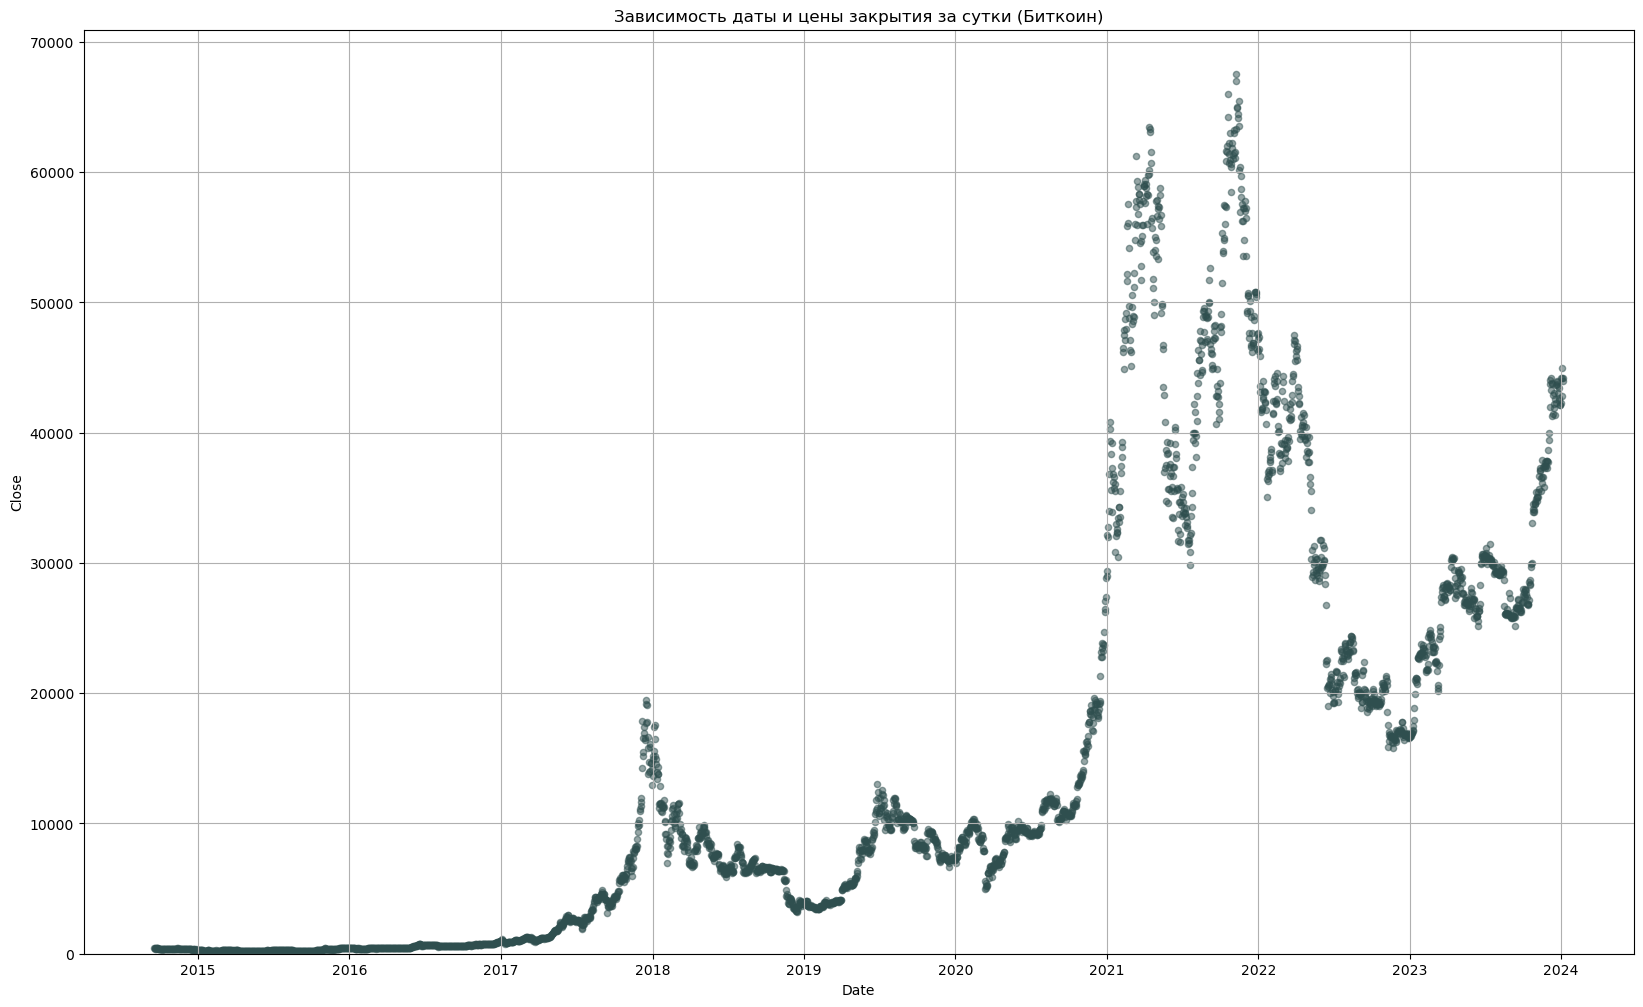

In [15]:
btc.plot(kind = 'scatter', 
         x = 'Date', 
         y = 'Close', 
         grid = True, 
         figsize = (20,12), 
         ylim = 0, 
         color = '#2F4F4F', 
         alpha = 0.5, 
         title = 'Зависимость даты и цены закрытия за сутки (Биткоин)')

In [16]:
# давайте посмотрим на топ 5 дней по объемам торгов и на стоимость BTC в сутки

# сделаем группировку по объему торгов и возьмем колонку с максимальными стоимостями в сутки

# в группировке поможет функция groupby()
# передаем ей объект для группировки, доп колонку с ма, делаем агрегирование данных и забираем 5 последних значений

# величина кусков пирога зависит от стоимости Биткоина

<Axes: title={'center': 'Топ 5 значений по объемам торгов в USD за сутки'}>

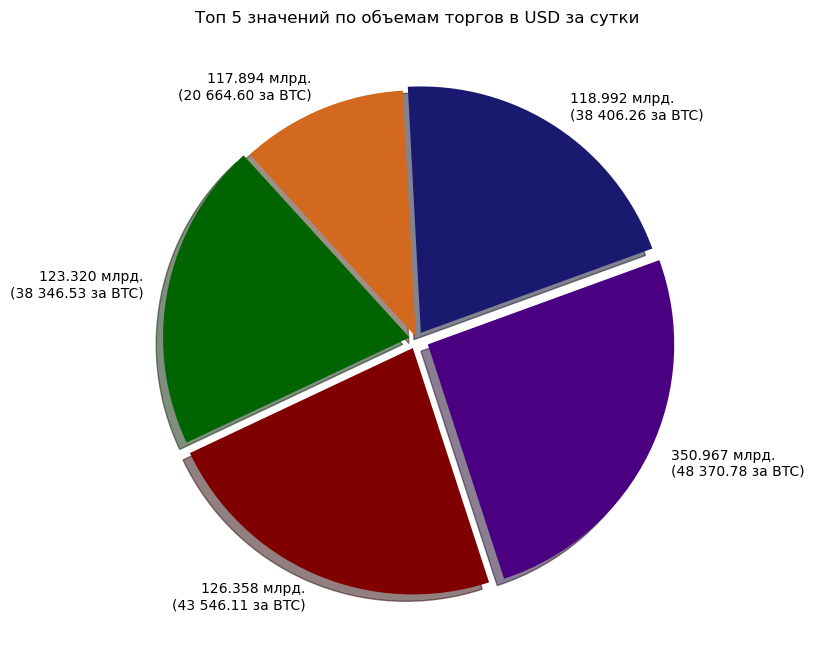

In [17]:
btc.groupby('Volume')['High'].max().tail(5).plot.pie(figsize = (12, 8),
                                                     title = 'Топ 5 значений по объемам торгов в USD за сутки',
                                                     labels = [f'118.992 млрд.\n(38 406.26 за BTC)',
                                                               f'117.894 млрд.\n(20 664.60 за BTC)',
                                                               f'123.320 млрд.\n(38 346.53 за BTC)',
                                                               f'126.358 млрд.\n(43 546.11 за BTC)',
                                                               f'350.967 млрд.\n(48 370.78 за BTC)'],
                                                     explode=[0.03, 0.01, 0.03, 0.04, 0.05],
                                                     colors = ['#191970','#D2691E','#006400','#800000','#4B0082'],
                                                     shadow=True,
                                                     startangle=20,
                                                     ylabel = '')
                                                               

In [18]:
# Попробуем сделать ещё один график - Бар график

# подготовим для этого сырьё
# создадим ДФ, используя словарь и функцию pd.DataFrame

# по каждой из 4х колонок у нас по 2 значения - минимальные и максимальные

In [19]:
btc_values = pd.DataFrame({'Open':[btc['Open'].min(), btc['Open'].max()],
                          'Close':[btc['Close'].min(), btc['Close'].max()],
                           'Close':[btc['Close'].min(), btc['Close'].max()],
                           'High':[btc['High'].min(), btc['High'].max()],
                           'Low min':[btc['Low'].min(), btc['Low'].max()]},
                          index = [1,2])

btc_values

,Open,Close,High,Low min
1,176.897003,178.102997,211.731003,171.509995
2,67549.734375,67566.828125,68789.625000,66382.062500


In [20]:
# построим на основании этих данных график
# к сожалению, в данной ситуации разрыв между показателями слишком велик и минимальные значение тяжело выявить

<Axes: >

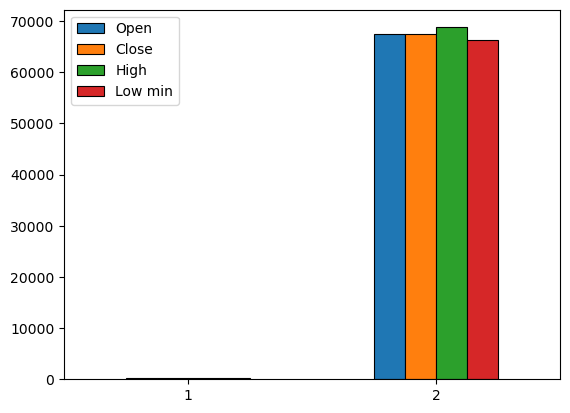

In [21]:
btc_values.plot.bar(rot=0,edgecolor = 'black', linewidth = 0.8)

In [22]:
# немного поработаем с таблицей, уберем колонку скорректированная цена закрытия (Adj Close)

# далее сделаем колонку с датами-индексами
# это можно было сделать через присваивание - btc_data.index = btc_data['Date']
# но я воспользуюсь методом из Пандас - set_index()
# inplace = True - делаем переприсваивание индексов

# посмотрим на 2 результата
# во втором варианте видим новые индексы

In [23]:
btc_data = btc[['Date','Open','High','Low','Close']]
display(btc_data)

btc_data.set_index('Date', inplace = True)
display(btc_data)

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
3394,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750
3395,2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781
3396,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875
3397,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406


,Open,High,Low,Close
Date,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750
2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875


In [24]:
# проверяем колонку и получаем DatetimeIndex
# теперь можно взаимодействовать с временным рядом, взять месяц, год и т.д.

# для группировки и агрегирования временных рядов есть ресемплирование, спец вид группировки
# метод Ресэмпл - resample()

In [25]:
btc_data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31',
               '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06'],
              dtype='datetime64[ns]', name='Date', length=3399, freq=None)

In [26]:
# добавим доп колонку колонку, в которой будет среднее значение, которое рассчитывается из 4х параметров

# агрегируем через Меан
# так как у нас ДФ, агрегация идет по двум осям
# исправим это через доп параметр - axis=1

In [27]:
btc_data['Dayly Average'] = btc_data[['Open', 'High', 'Low', 'Close']].mean(axis=1)
btc_data

C:\Users\vladi\AppData\Local\Temp\ipykernel_10816\3045140360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_data['Dayly Average'] = btc_data[['Open', 'High', 'Low', 'Close']].mean(axis=1)


,Open,High,Low,Close,Dayly Average
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,460.948509
2014-09-18,456.859985,456.859985,413.104004,424.440002,437.815994
2014-09-19,424.102997,427.834991,384.532013,394.795990,407.816498
2014-09-20,394.673004,423.295990,389.882996,408.903992,404.188996
2014-09-21,408.084991,412.425995,393.181000,398.821014,403.128250
...,...,...,...,...,...
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44805.441406
2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781,43531.638672
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,43620.234375


In [28]:
# для примера посмотрим на линейный график средней стоимости Биткоина

# там как в метках у нас временные объекты, цена автоматом привязывается к дате

<Axes: title={'center': 'Средняя стоимость актива за сутки (Биткоин)'}, xlabel='Dates', ylabel='Cost'>

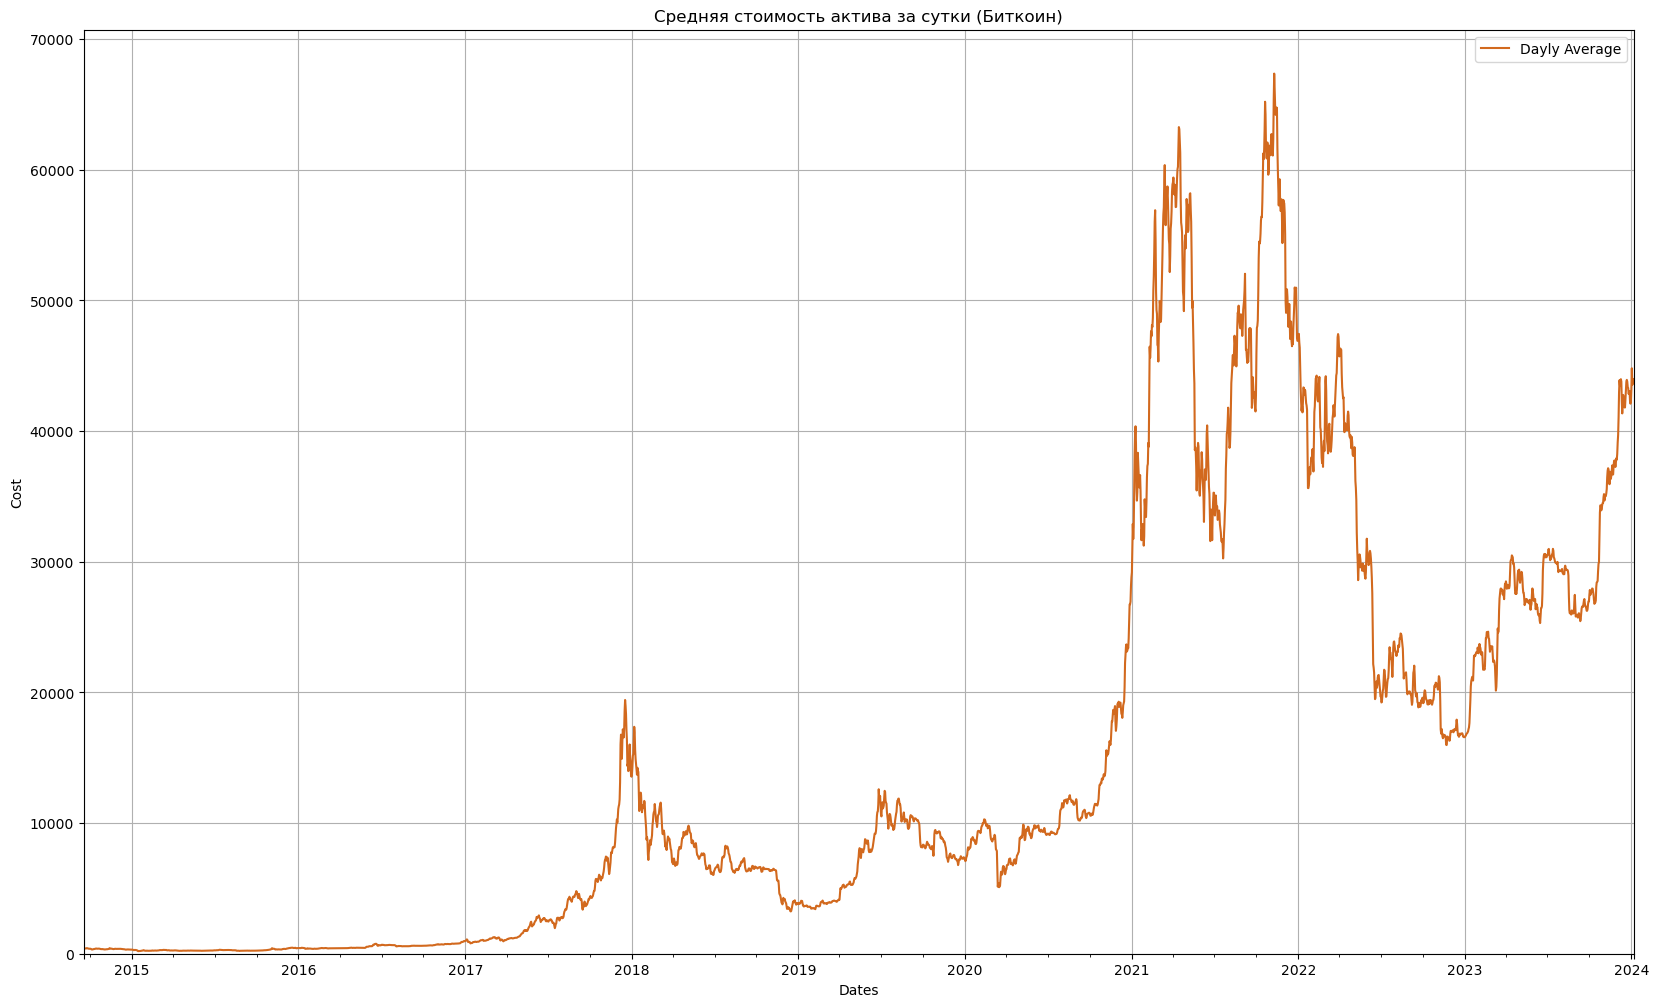

In [29]:
btc_data['Dayly Average'].plot(xlabel = 'Dates', 
                               ylabel = 'Cost', 
                               grid = True, 
                               figsize = (20, 12), 
                               ylim = 0,
                               legend = True,
                               title = 'Средняя стоимость актива за сутки (Биткоин)',
                               color = '#D2691E')

In [30]:
# для примера посмотрим на параллельные линейные графики высокой, низкой и средней стоимости Биткоина за каждый день торгов
# по графику можно наблюдать возможный тренд на рост

<Axes: title={'center': 'График стоимостей Биткоина'}, xlabel='Dates', ylabel='Cost'>

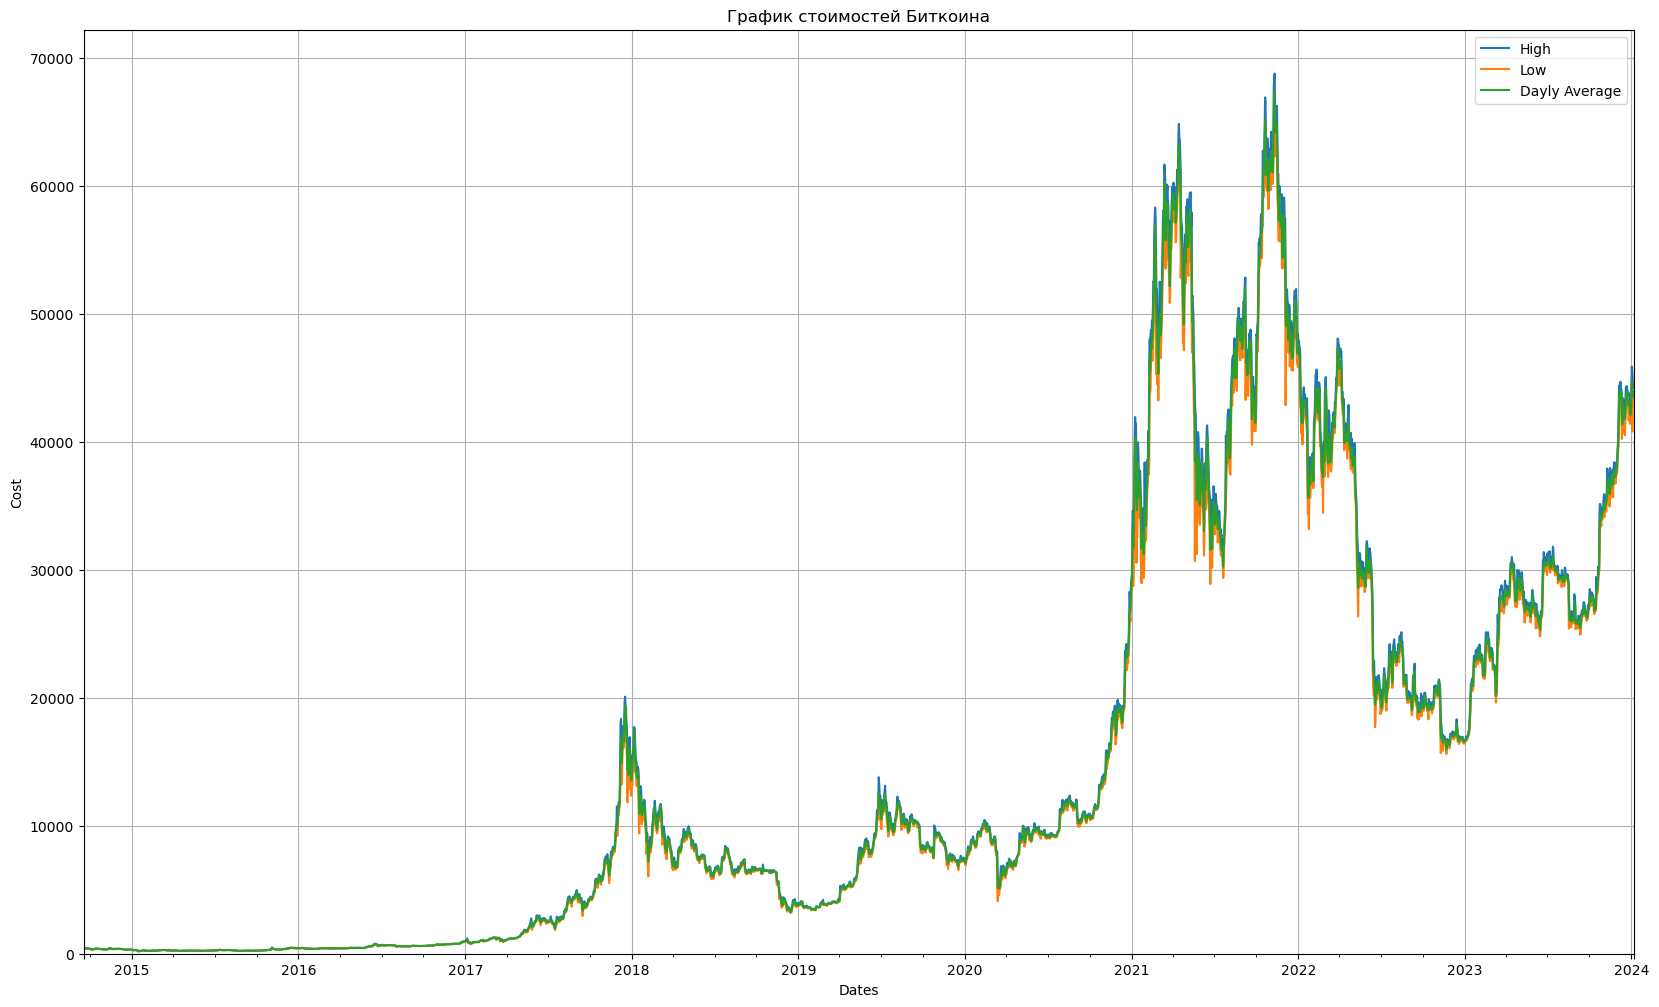

In [31]:
btc_data[['High','Low', 'Dayly Average']].plot(xlabel = 'Dates', 
                              ylabel = 'Cost', 
                              grid = True,
                              figsize = (20, 12),
                              ylim = 0,
                              title = 'График стоимостей Биткоина')

In [32]:
# посмотрим на гистограмму по средней стоимости Биткоина

# больше всего значений в примерном диапазоне от чуть более нуля до трех с небольшим тысяч долларов

<Axes: title={'center': 'График распределения по средней стоимости Биткоина'}, ylabel='Frequency'>

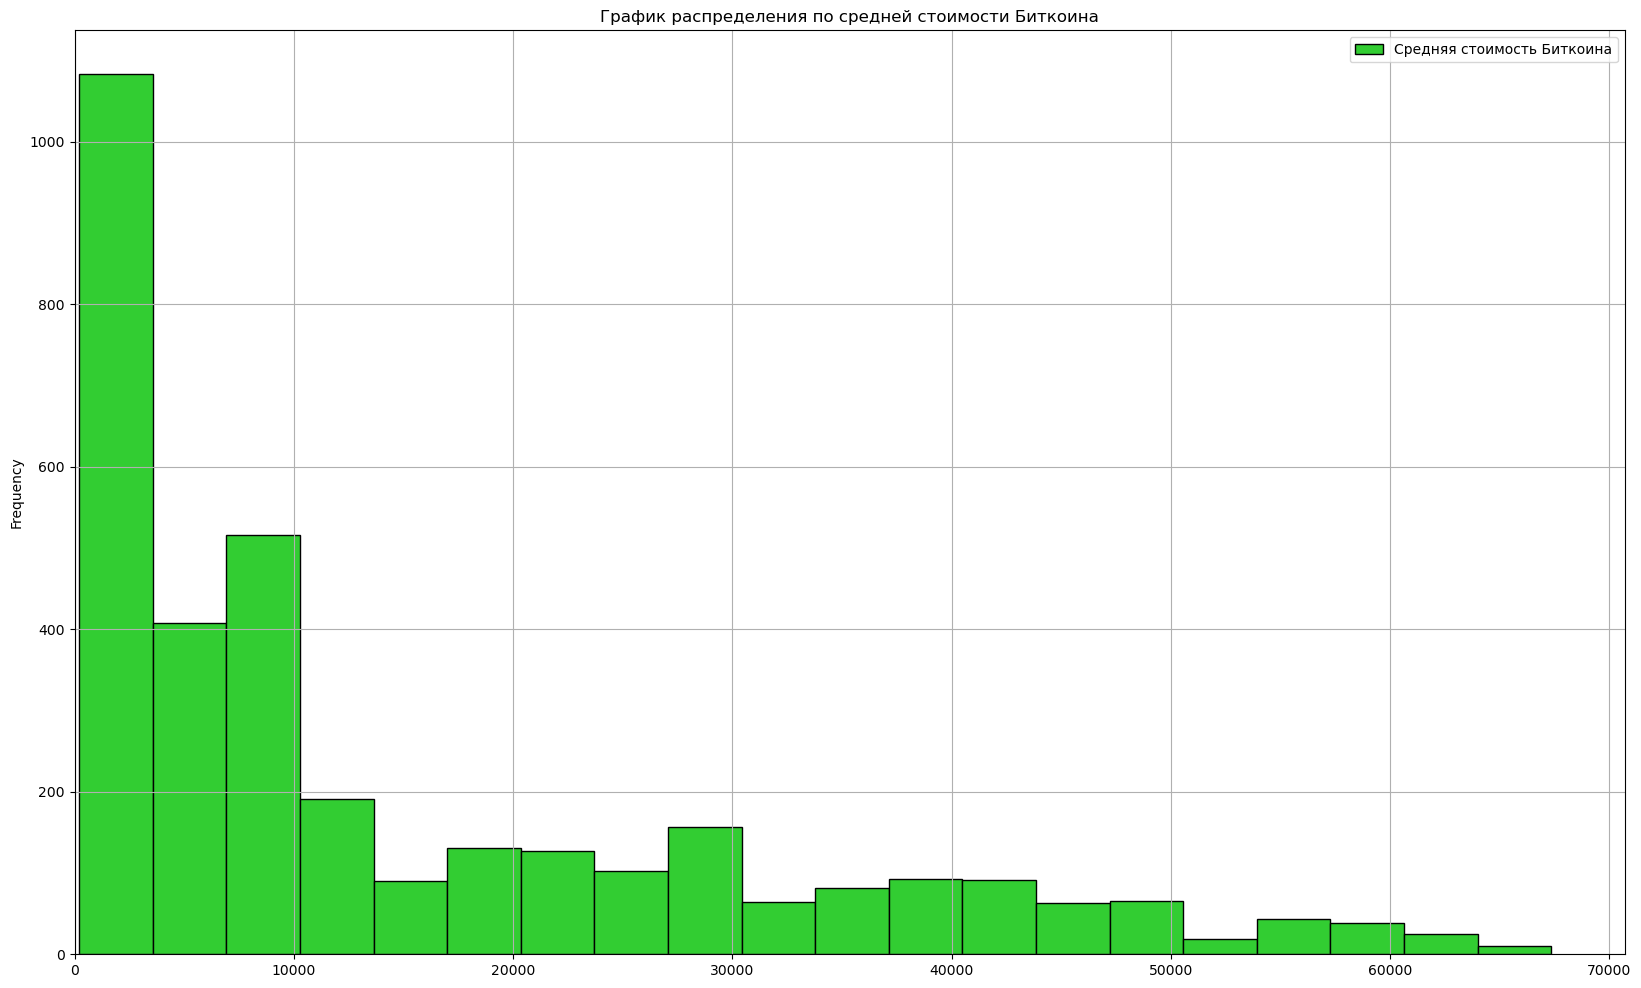

In [33]:
btc_data['Dayly Average'].plot(figsize = (20, 12), 
                      kind = 'hist', 
                      bins = 20, 
                      grid = True,
                      xlim = 0,
                      color = '#32CD32',
                      legend = True,
                      label = 'Средняя стоимость Биткоина',
                      title = 'График распределения по средней стоимости Биткоина',
                      edgecolor = 'black')

In [34]:
# посмотрим эти же данные, но через график оценки плотности ядра с использованием гауссовских ядер или kde
# альтернативный график распределения

In [35]:
# для корректного отображения графика нам понадобятся минимальные и максимальные значения
# воспользуюсь функциями min() и max()

<Axes: title={'center': 'График оценки плотности ядра'}, ylabel='Density'>

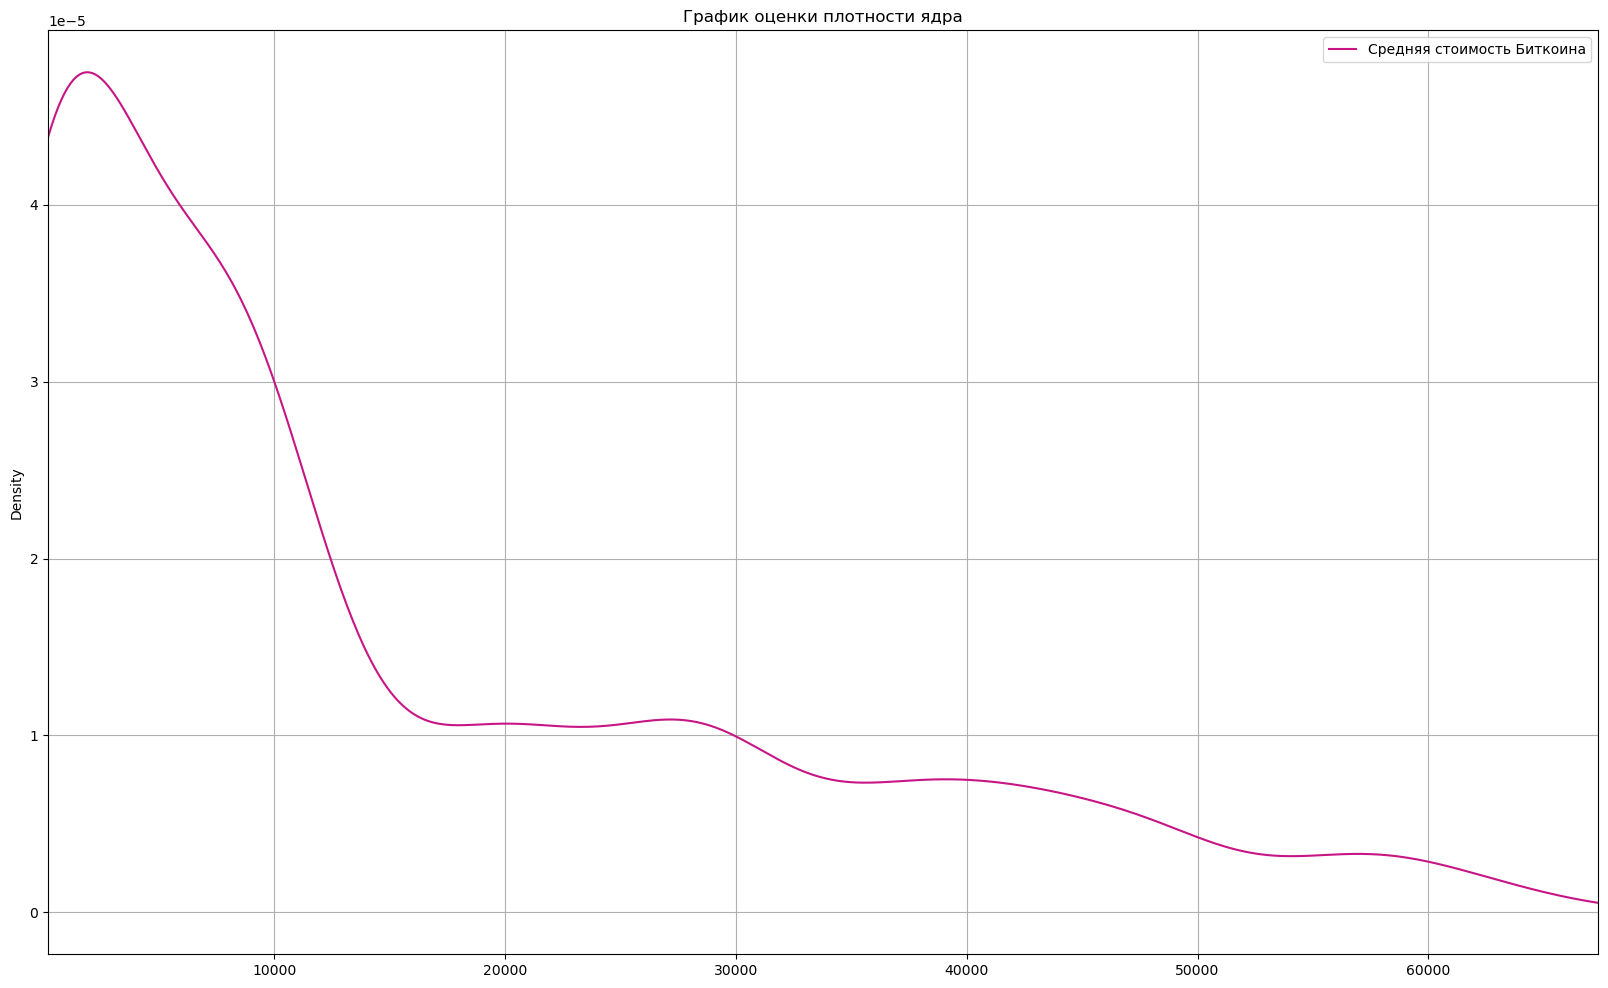

In [36]:
btc_data['Dayly Average'].plot(figsize = (20, 12),
                               kind = 'kde',
                               grid = True,
                               title = 'График оценки плотности ядра', 
                               color = '#C71585',
                               xlim = [btc_data['Dayly Average'].min(), btc_data['Dayly Average'].max()],
                               legend = True,
                               label = 'Средняя стоимость Биткоина')